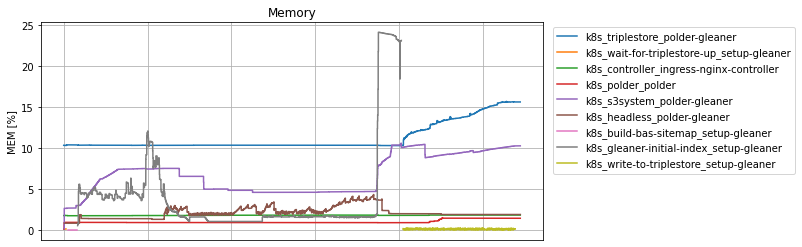

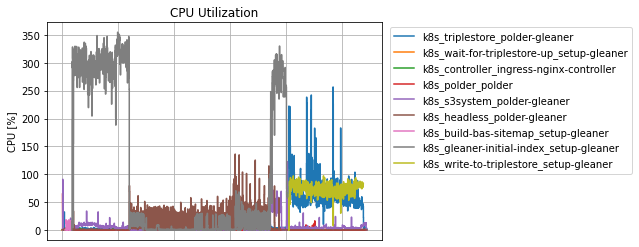

In [10]:
# Adapted from https://naartti.medium.com/analyse-docker-stats-with-python-pandas-2c2ed735cfcd

import os
import pandas as pd
from glob import glob
import re
import seaborn as sns
import matplotlib.pyplot as plt

def get_only_characters(string):
    return re.sub('[^a-zA-Z]+', '', string)

def get_only_numbers(string):
    return float(re.sub('[^\d\.]', '', string))

def to_bit(value):
    return int({
        "b": get_only_numbers(value) * 1,
        "kib": get_only_numbers(value) * 10e3,
        "kb": get_only_numbers(value) * 10e3,
        "mib": get_only_numbers(value) * 10e6,
        "mb": get_only_numbers(value) * 10e6,
        "gib": get_only_numbers(value) * 10e9,
        "gb": get_only_numbers(value) * 10e9,
    }.get(get_only_characters(value).lower(), 0))

def percentage_to_float(df_col):
    return df_col.apply(lambda x: 0.0 if x == "--" else float(x[0:-1]))
#     return df_col.apply(lambda x:))

def split_on_slash(df_col, split_index):
    return df_col.apply(lambda x: x.split(" / ")[split_index])

df = pd.read_csv("stats.csv", engine="python")
df = df[df.NAME != "NAME"]

df["mem_percentage"] = percentage_to_float(df["MEM %"])
df["cpu_percentage"] = percentage_to_float(df["CPU %"])

fig, ax = plt.subplots(1, 1, figsize=(9, 4))

sns.lineplot(x=df.index, y="mem_percentage", hue="NAME", data=df, drawstyle="steps")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.ylabel("MEM [%]")
plt.title(f"Memory")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.grid()
plt.show()

sns.lineplot(x=df.index, y="cpu_percentage", hue="NAME", data=df, drawstyle="steps")
plt.legend(bbox_to_anchor=(1.01, 1), loc='upper left')
plt.ylabel("CPU [%]")
plt.title(f"CPU Utilization")
plt.tick_params(axis='x', which='both', bottom=False, top=False, labelbottom=False)
plt.grid()
plt.show()